# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

idx = np.random.permutation(len(full_train.x))
full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]

del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf

model_name = 'simple_lstm_bagging_without_normalize'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=(1000,102)),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128),input_shape=(1000,102)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])
    
    if show_summary:
        model.summary()
    
    return model
    



## Training with Bagging

Training bag 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               236544    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 277,761
Trainable params: 277,761
Non-trainable params: 0
___________________________________

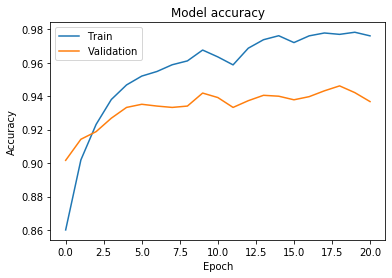

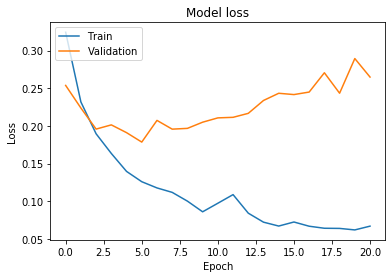

Training bag 1
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 25s - loss: 0.3402 - accuracy: 0.8553 - val_loss: 0.2575 - val_accuracy: 0.8936
Epoch 2/100
13437/13437 - 23s - loss: 0.2333 - accuracy: 0.9040 - val_loss: 0.2240 - val_accuracy: 0.9161
Epoch 3/100
13437/13437 - 23s - loss: 0.1903 - accuracy: 0.9222 - val_loss: 0.2243 - val_accuracy: 0.8971
Epoch 4/100
13437/13437 - 23s - loss: 0.1600 - accuracy: 0.9382 - val_loss: 0.1820 - val_accuracy: 0.9252
Epoch 5/100
13437/13437 - 23s - loss: 0.1482 - accuracy: 0.9420 - val_loss: 0.1803 - val_accuracy: 0.9346
Epoch 6/100
13437/13437 - 23s - loss: 0.1272 - accuracy: 0.9509 - val_loss: 0.1781 - val_accuracy: 0.9293
Epoch 7/100
13437/13437 - 23s - loss: 0.1180 - accuracy: 0.9544 - val_loss: 0.1776 - val_accuracy: 0.9301
Epoch 8/100
13437/13437 - 23s - loss: 0.1106 - accuracy: 0.9568 - val_loss: 0.2040 - val_accuracy: 0.9301
Epoch 9/100
13437/13437 - 23s - loss: 0.0988 - accuracy: 0.9618 - val_loss: 0.1848 - val

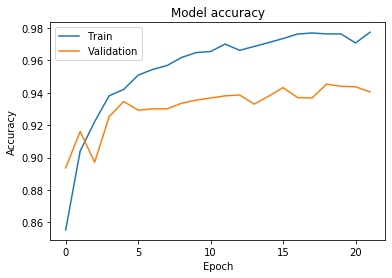

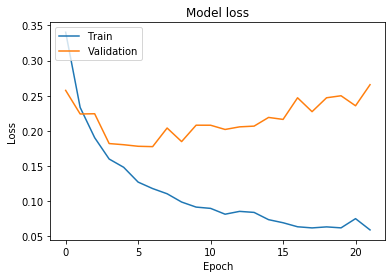

Training bag 2
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3360 - accuracy: 0.8523 - val_loss: 0.2429 - val_accuracy: 0.8987
Epoch 2/100
13437/13437 - 23s - loss: 0.2282 - accuracy: 0.9029 - val_loss: 0.2095 - val_accuracy: 0.9108
Epoch 3/100
13437/13437 - 23s - loss: 0.1924 - accuracy: 0.9193 - val_loss: 0.1969 - val_accuracy: 0.9172
Epoch 4/100
13437/13437 - 23s - loss: 0.1561 - accuracy: 0.9361 - val_loss: 0.1791 - val_accuracy: 0.9317
Epoch 5/100
13437/13437 - 23s - loss: 0.1394 - accuracy: 0.9451 - val_loss: 0.1651 - val_accuracy: 0.9357
Epoch 6/100
13437/13437 - 23s - loss: 0.1195 - accuracy: 0.9559 - val_loss: 0.1755 - val_accuracy: 0.9311
Epoch 7/100
13437/13437 - 23s - loss: 0.1115 - accuracy: 0.9566 - val_loss: 0.1713 - val_accuracy: 0.9400
Epoch 8/100
13437/13437 - 23s - loss: 0.0935 - accuracy: 0.9657 - val_loss: 0.1838 - val_accuracy: 0.9402
Epoch 9/100
13437/13437 - 23s - loss: 0.0913 - accuracy: 0.9676 - val_loss: 0.1968 - val

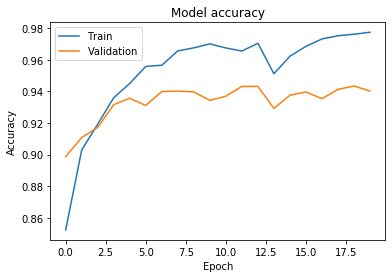

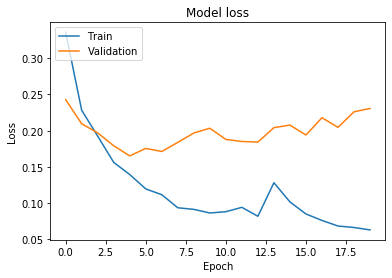

Training bag 3
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 28s - loss: 0.3198 - accuracy: 0.8610 - val_loss: 0.2535 - val_accuracy: 0.8939
Epoch 2/100
13437/13437 - 24s - loss: 0.2263 - accuracy: 0.9076 - val_loss: 0.3224 - val_accuracy: 0.8392
Epoch 3/100
13437/13437 - 24s - loss: 0.2003 - accuracy: 0.9157 - val_loss: 0.1929 - val_accuracy: 0.9204
Epoch 4/100
13437/13437 - 23s - loss: 0.1609 - accuracy: 0.9347 - val_loss: 0.1791 - val_accuracy: 0.9309
Epoch 5/100
13437/13437 - 24s - loss: 0.1434 - accuracy: 0.9441 - val_loss: 0.1808 - val_accuracy: 0.9322
Epoch 6/100
13437/13437 - 23s - loss: 0.1307 - accuracy: 0.9477 - val_loss: 0.1979 - val_accuracy: 0.9298
Epoch 7/100
13437/13437 - 23s - loss: 0.1132 - accuracy: 0.9541 - val_loss: 0.1770 - val_accuracy: 0.9341
Epoch 8/100
13437/13437 - 23s - loss: 0.1084 - accuracy: 0.9566 - val_loss: 0.1752 - val_accuracy: 0.9394
Epoch 9/100
13437/13437 - 24s - loss: 0.0933 - accuracy: 0.9643 - val_loss: 0.1672 - val

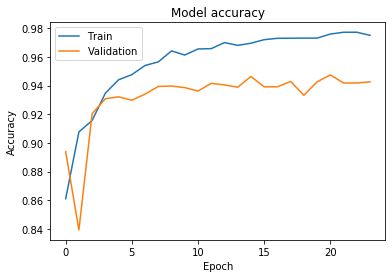

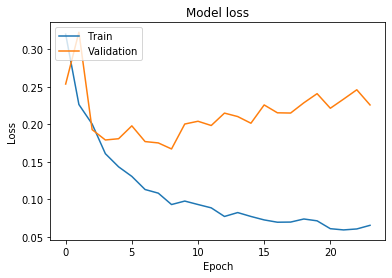

Training bag 4
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3379 - accuracy: 0.8564 - val_loss: 0.2370 - val_accuracy: 0.9051
Epoch 2/100
13437/13437 - 23s - loss: 0.2296 - accuracy: 0.9048 - val_loss: 0.2186 - val_accuracy: 0.9140
Epoch 3/100
13437/13437 - 23s - loss: 0.1909 - accuracy: 0.9206 - val_loss: 0.2077 - val_accuracy: 0.9175
Epoch 4/100
13437/13437 - 23s - loss: 0.1636 - accuracy: 0.9344 - val_loss: 0.1952 - val_accuracy: 0.9215
Epoch 5/100
13437/13437 - 23s - loss: 0.1507 - accuracy: 0.9399 - val_loss: 0.1933 - val_accuracy: 0.9242
Epoch 6/100
13437/13437 - 23s - loss: 0.1310 - accuracy: 0.9481 - val_loss: 0.1820 - val_accuracy: 0.9277
Epoch 7/100
13437/13437 - 23s - loss: 0.1196 - accuracy: 0.9542 - val_loss: 0.1784 - val_accuracy: 0.9322
Epoch 8/100
13437/13437 - 23s - loss: 0.1131 - accuracy: 0.9564 - val_loss: 0.1825 - val_accuracy: 0.9344
Epoch 9/100
13437/13437 - 23s - loss: 0.0983 - accuracy: 0.9623 - val_loss: 0.1893 - val

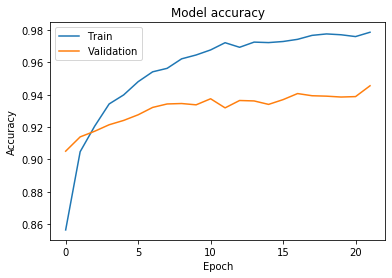

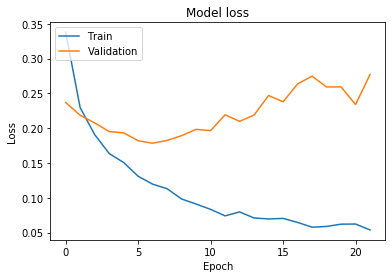

Training bag 5
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3351 - accuracy: 0.8555 - val_loss: 0.2397 - val_accuracy: 0.9009
Epoch 2/100
13437/13437 - 23s - loss: 0.2215 - accuracy: 0.9041 - val_loss: 0.2141 - val_accuracy: 0.9113
Epoch 3/100
13437/13437 - 23s - loss: 0.1823 - accuracy: 0.9251 - val_loss: 0.2069 - val_accuracy: 0.9207
Epoch 4/100
13437/13437 - 23s - loss: 0.1613 - accuracy: 0.9329 - val_loss: 0.1881 - val_accuracy: 0.9242
Epoch 5/100
13437/13437 - 23s - loss: 0.1439 - accuracy: 0.9438 - val_loss: 0.1889 - val_accuracy: 0.9290
Epoch 6/100
13437/13437 - 24s - loss: 0.1306 - accuracy: 0.9503 - val_loss: 0.2089 - val_accuracy: 0.9314
Epoch 7/100
13437/13437 - 23s - loss: 0.1208 - accuracy: 0.9538 - val_loss: 0.1889 - val_accuracy: 0.9330
Epoch 8/100
13437/13437 - 23s - loss: 0.1073 - accuracy: 0.9586 - val_loss: 0.1956 - val_accuracy: 0.9349
Epoch 9/100
13437/13437 - 23s - loss: 0.1033 - accuracy: 0.9609 - val_loss: 0.2031 - val

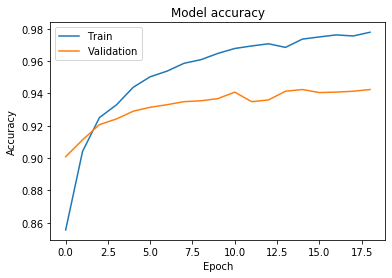

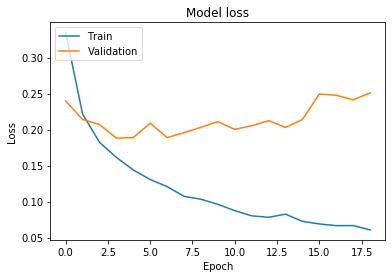

Training bag 6
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 28s - loss: 0.3202 - accuracy: 0.8614 - val_loss: 0.2666 - val_accuracy: 0.8976
Epoch 2/100
13437/13437 - 23s - loss: 0.2197 - accuracy: 0.9101 - val_loss: 0.2429 - val_accuracy: 0.8979
Epoch 3/100
13437/13437 - 23s - loss: 0.1827 - accuracy: 0.9285 - val_loss: 0.1915 - val_accuracy: 0.9207
Epoch 4/100
13437/13437 - 23s - loss: 0.1547 - accuracy: 0.9396 - val_loss: 0.1928 - val_accuracy: 0.9301
Epoch 5/100
13437/13437 - 23s - loss: 0.1337 - accuracy: 0.9485 - val_loss: 0.1834 - val_accuracy: 0.9309
Epoch 6/100
13437/13437 - 23s - loss: 0.1204 - accuracy: 0.9539 - val_loss: 0.2091 - val_accuracy: 0.9282
Epoch 7/100
13437/13437 - 23s - loss: 0.1107 - accuracy: 0.9580 - val_loss: 0.1980 - val_accuracy: 0.9325
Epoch 8/100
13437/13437 - 23s - loss: 0.1056 - accuracy: 0.9607 - val_loss: 0.2109 - val_accuracy: 0.9327
Epoch 9/100
13437/13437 - 23s - loss: 0.0964 - accuracy: 0.9650 - val_loss: 0.2015 - val

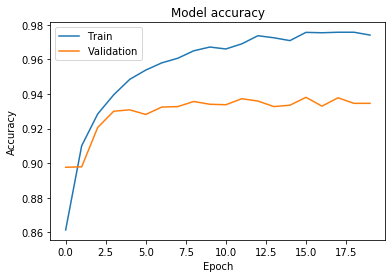

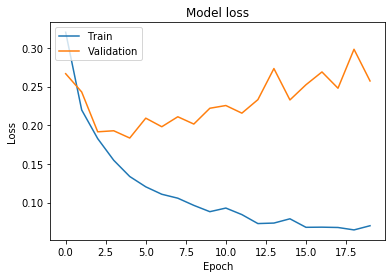

Training bag 7
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3376 - accuracy: 0.8541 - val_loss: 0.2356 - val_accuracy: 0.9049
Epoch 2/100
13437/13437 - 23s - loss: 0.2213 - accuracy: 0.9082 - val_loss: 0.2165 - val_accuracy: 0.9135
Epoch 3/100
13437/13437 - 23s - loss: 0.1886 - accuracy: 0.9236 - val_loss: 0.2082 - val_accuracy: 0.9215
Epoch 4/100
13437/13437 - 23s - loss: 0.1612 - accuracy: 0.9375 - val_loss: 0.1749 - val_accuracy: 0.9354
Epoch 5/100
13437/13437 - 24s - loss: 0.1417 - accuracy: 0.9445 - val_loss: 0.1834 - val_accuracy: 0.9234
Epoch 6/100
13437/13437 - 24s - loss: 0.1309 - accuracy: 0.9490 - val_loss: 0.1746 - val_accuracy: 0.9333
Epoch 7/100
13437/13437 - 24s - loss: 0.1094 - accuracy: 0.9590 - val_loss: 0.1709 - val_accuracy: 0.9432
Epoch 8/100
13437/13437 - 24s - loss: 0.1173 - accuracy: 0.9548 - val_loss: 0.1866 - val_accuracy: 0.9389
Epoch 9/100
13437/13437 - 24s - loss: 0.0981 - accuracy: 0.9618 - val_loss: 0.1868 - val

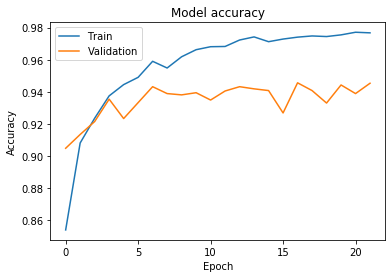

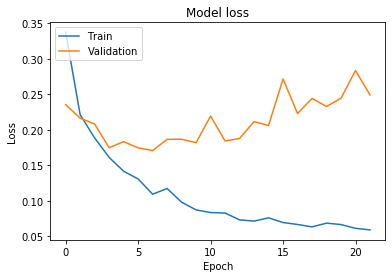

Training bag 8
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 28s - loss: 0.3324 - accuracy: 0.8570 - val_loss: 0.2399 - val_accuracy: 0.9046
Epoch 2/100
13437/13437 - 23s - loss: 0.2232 - accuracy: 0.9059 - val_loss: 0.2226 - val_accuracy: 0.9140
Epoch 3/100
13437/13437 - 24s - loss: 0.1897 - accuracy: 0.9244 - val_loss: 0.2051 - val_accuracy: 0.9180
Epoch 4/100
13437/13437 - 24s - loss: 0.1579 - accuracy: 0.9376 - val_loss: 0.1907 - val_accuracy: 0.9274
Epoch 5/100
13437/13437 - 24s - loss: 0.1404 - accuracy: 0.9445 - val_loss: 0.2040 - val_accuracy: 0.9277
Epoch 6/100
13437/13437 - 24s - loss: 0.1231 - accuracy: 0.9526 - val_loss: 0.2121 - val_accuracy: 0.9285
Epoch 7/100
13437/13437 - 24s - loss: 0.1119 - accuracy: 0.9551 - val_loss: 0.2075 - val_accuracy: 0.9346
Epoch 8/100
13437/13437 - 24s - loss: 0.1020 - accuracy: 0.9613 - val_loss: 0.2058 - val_accuracy: 0.9268
Epoch 9/100
13437/13437 - 24s - loss: 0.0926 - accuracy: 0.9652 - val_loss: 0.2093 - val

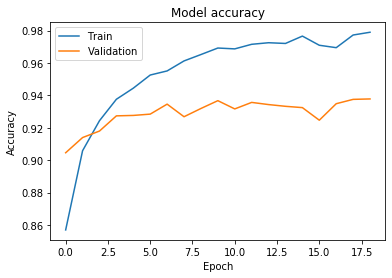

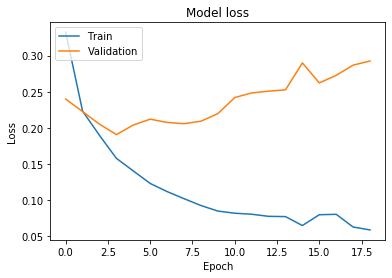

Training bag 9
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3409 - accuracy: 0.8536 - val_loss: 0.2518 - val_accuracy: 0.8904
Epoch 2/100
13437/13437 - 23s - loss: 0.2258 - accuracy: 0.9052 - val_loss: 0.2154 - val_accuracy: 0.9110
Epoch 3/100
13437/13437 - 24s - loss: 0.1803 - accuracy: 0.9274 - val_loss: 0.1945 - val_accuracy: 0.9247
Epoch 4/100
13437/13437 - 24s - loss: 0.1532 - accuracy: 0.9387 - val_loss: 0.1837 - val_accuracy: 0.9223
Epoch 5/100
13437/13437 - 36s - loss: 0.1335 - accuracy: 0.9495 - val_loss: 0.1754 - val_accuracy: 0.9325
Epoch 6/100
13437/13437 - 37s - loss: 0.1194 - accuracy: 0.9551 - val_loss: 0.2125 - val_accuracy: 0.9210
Epoch 7/100
13437/13437 - 27s - loss: 0.1133 - accuracy: 0.9572 - val_loss: 0.1894 - val_accuracy: 0.9330
Epoch 8/100
13437/13437 - 30s - loss: 0.1095 - accuracy: 0.9591 - val_loss: 0.1793 - val_accuracy: 0.9362
Epoch 9/100
13437/13437 - 23s - loss: 0.0950 - accuracy: 0.9636 - val_loss: 0.1789 - val

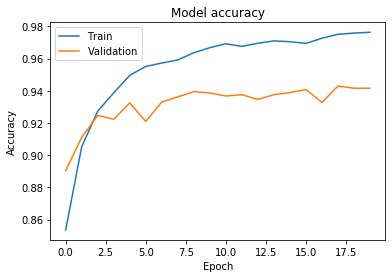

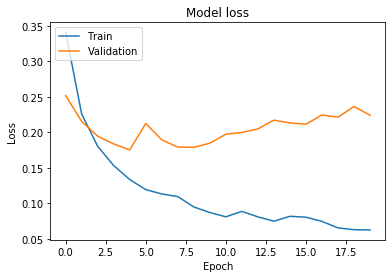

In [3]:
num_of_bags = 10
epochs_per_bag = 100

import os
import matplotlib.pyplot as plt
%matplotlib inline

for bag in range(num_of_bags):
    print("Training bag "+str(bag))

    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=15, 
        mode='auto', 
        restore_best_weights=True)
    
    
    # Put data into bags
    idx = np.random.randint(train_data_x.shape[0], size=train_data_x.shape[0]//10*9)
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]

    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=64,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 10)
(6051,)




## Save Prediction to CSV

In [5]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_simple_lstm_bagging_without_normalize.csv
